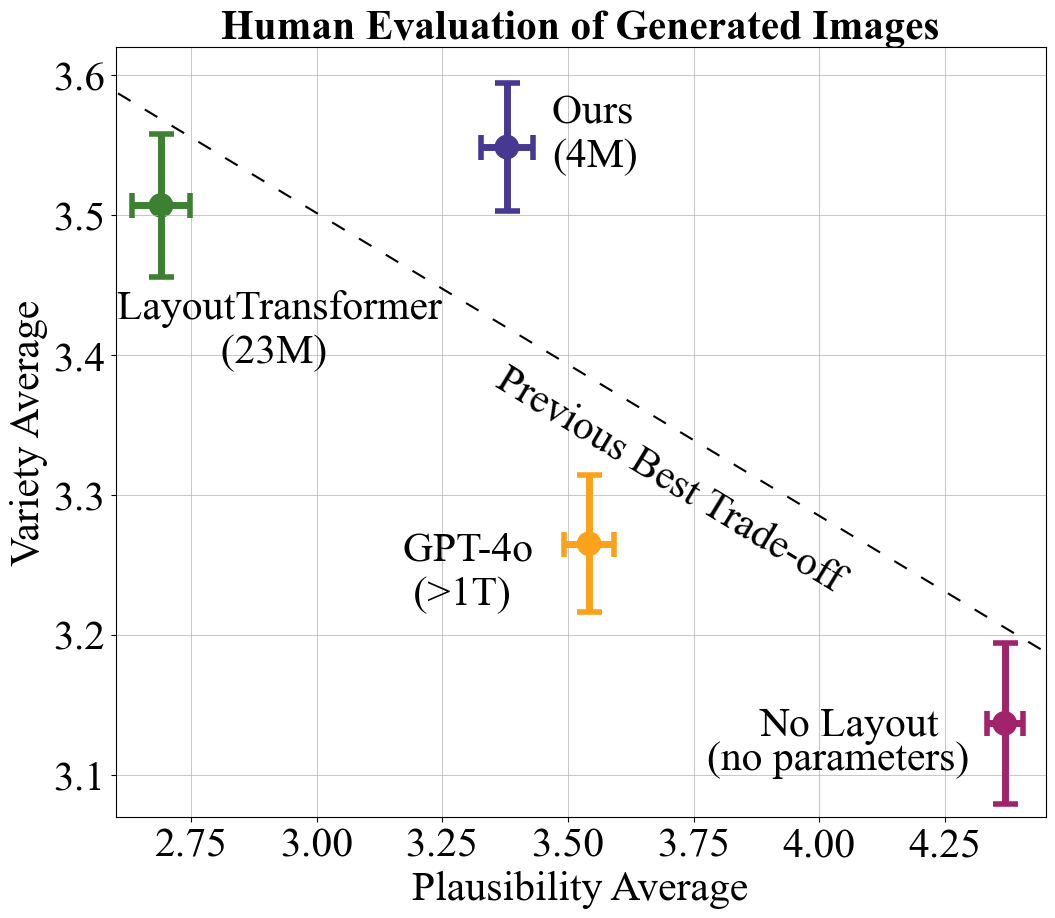

In [23]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from matplotlib.font_manager import FontProperties


# Sample data (replace with your actual data)
models = ['LayoutTransformer \n          (23M)', 'Ours \n(4M)', 'GPT-4o \n (>1T)', 'No Layout']
colors = ['#3C8031', '#473992', '#FAA21A', '#A1246B']
variability_avg = [2.506666666666667+1, 2.5483333333333333+1, 2.265+1, 2.1366666666666667+1]  # Y-axis data: Variability Average
plausibility_avg = [1.6905393457117595+1, 2.37842617152962+1, 2.541998231653404+1, 3.3687002652519893+1]  # X-axis data: Plausibility Average
plausibility_se = [0.057260768175959945, 0.051472873417945264, 0.05054266151889562, 0.0359111548502453]  # X-axis data: Plausibility Standard Error
variability_se = [0.05131529264516826, 0.0457832554705482, 0.04890083503036187, 0.05727112257919764]  # Y-axis data: Variability Standard Error

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))



# Adjust the font size of the x and y ticks
plt.xticks(fontsize=30, fontname='Times New Roman')  # Increase the font size for x-axis
plt.yticks(fontsize=30, fontname='Times New Roman')  # Increase the font size for y-axis


# Draw a line between two points (for example, between "Ours" and "Layout Transformer")
x1, y1 = plausibility_avg[0] - 0.0855, variability_avg[0] + 0.077  # Coordinates of "Ours"
x2, y2 = plausibility_avg[3] + 0.09, variability_avg[3] + 0.046  # Coordinates of "Layout Transformer"

# Plot the line between "Ours" and "Layout Transformer"
ax.plot([x1, x2], [y1+0.003, y2+0.003], color='black', linestyle='--', dashes=(7, 8))  


# Plot error bars for each model (both x and y errors)
for i in range(len(models)):
    ax.errorbar(plausibility_avg[i], variability_avg[i], 
                xerr=plausibility_se[i], yerr=variability_se[i], 
                fmt='o', color=colors[i], capsize=9, linestyle='None', elinewidth=5, capthick=4)
    
# Customize the plot
ax.set_title('Human Evaluation of Generated Images', fontsize=30, fontweight='bold', fontname='Times New Roman')
ax.set_xlabel('Plausibility Average', fontsize=30, fontname='Times New Roman')
ax.set_ylabel('Variety Average', fontsize=30, fontname='Times New Roman')

# # Create custom legend handles with colors
# legend_elements = [
#     Line2D([0], [0], marker='o', color='red', markersize=11, linestyle='None', label="GPT-4o:                          >1T"),
#     Line2D([0], [0], marker='o', color='purple', markersize=8, linestyle='None', label="Layout Transformer:       "),
#     Line2D([0], [0], marker='o', color='blue', markersize=5, linestyle='None', label="Ours:                               4M")
# ]

# # Display the custom legend in the top right
# plt.legend(handles=legend_elements, loc="upper right", title="      Model Parameters", frameon=True, 
#             bbox_to_anchor=(1, 0.874),labelspacing=0.5, handletextpad=0.2, fontsize=21, title_fontsize=21)  # Reduce space between marker and text)
    
# Add text annotations for the models (adjusting the position to avoid overlap)
ax.text(plausibility_avg[0]-0.0876, variability_avg[0]-0.06, models[0], fontsize=30, ha='left', va='top', fontname='Times New Roman')
ax.text(plausibility_avg[1]+0.09, variability_avg[1]-0.02, models[1], fontsize=30, ha='left', va='bottom', fontname='Times New Roman')


# Limit the axes to avoid excessive empty space
ax.set_xlim(1.6+1, 3.45+1)
ax.set_ylim(2.07+1, 2.62+1)
# Show grid
ax.grid(True)

# Set the grid line width to be consistent across all lines
plt.grid(True, linewidth=0.5)  # Adjust the linewidth to make it thinner


# Calculate the slope angle for the text rotation
angle = np.degrees(np.arctan2(y2 - y1-0.7, x2 - x1-0.04))

# Add the text along the line
ax.text(
    (x1 + x2) / 2 +0.19,  # X position: midpoint of the line
    (y1 + y2) / 2 -0.06,  # Y position: midpoint, slightly below the line
    "Previous Best Trade-off",
    rotation=angle,        # Rotate text to match line slope
    rotation_mode='anchor', # Ensures text rotation starts from anchor point
    ha='center',            # Center horizontally
    va='top',               # Align text just below the line
    fontsize=30,             # Adjust font size as needed
    color='black', fontname='Times New Roman'
)

# Scatter plot with circle sizes proportional to the log of model size
scatter = ax.scatter(plausibility_avg, variability_avg, s=280, c=colors, alpha=1)

ax.text(plausibility_avg[2]-0.37, variability_avg[2]+0.009, models[2], fontsize=30, ha='left', va='top', fontname='Times New Roman')
# Adjust position of "(no parameters)" below "No Layout"
ax.text(plausibility_avg[3]-0.13, variability_avg[3]+0.012, models[3], fontsize=30, ha='right', va='top', fontname='Times New Roman')
plt.text(plausibility_avg[3]-0.07, variability_avg[3]-0.012, '(no parameters)', fontsize=30,  ha='right', va='top', fontname='Times New Roman')
# Show the plot without grid
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
from matplotlib.ticker import StrMethodFormatter, NullFormatter


# Data based on the provided table (model names and values)
metrics = [ 'Composition KL Div (↓)','Position KDE Single x ($\t 10^{-11}$) (↑)', 'Position KDE Pairs x ($\t 10^{-11}$) (↑)', 'Position Variation Mean (↑)']

layout_t = [9.05e-3, 3.09, 1.21, 231]
gpt4o = [37.07e-3, 4.37, 1.49, 93.28]
ours = [9.07e-3, 4.30, 2.02, 170]
contrived_structure = [37.76e-3, 2.67, 1.28, 151]

# Organizing the data into one matrix
data = np.array([ours, layout_t, gpt4o, contrived_structure])

# Colors for each model
colors = ['purple', 'red', 'blue', 'orange']


# Plotting
fig, axes = plt.subplots(1, len(metrics), figsize=(30, 6))  # Arrange bars in a row

#ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#ax.ticklabel_format(style='plain', axis='y')  # Ensure plain format (no scientific notation)
from matplotlib.ticker import FormatStrFormatter
 
for i, metric in enumerate(metrics):
    axes[i].bar(range(4), data[:, i], color=colors, tick_label=['LayoutT', 'GPT4o', 'Ours', 'Contrived Structure'])
    #axes[i].set_title(metric)
    axes[i].yaxis.set_major_formatter(lambda x, pos: f'{x:.1f}')
    axes[i].set_xlabel('Models', fontsize=16)
    axes[i].set_ylabel(metrics[i], fontsize=16)
    
    axes[i].set_yscale('log' if i < 3 else 'linear')  # Apply log scale for small values

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()